# Extracting and Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn import metrics
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Activation, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from ann_visualizer.visualize import ann_viz

Using TensorFlow backend.


In [2]:
df = pd.read_csv('/Users/svishnuprasadha/Desktop/Concrete_Data.csv')
df.sample(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
667,192.0,288.0,0.0,192.0,0.0,929.8,716.1,28,39.32
276,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,28,29.65
436,172.4,13.6,172.4,156.8,4.1,1006.3,856.4,28,33.69
811,310.0,0.0,0.0,192.0,0.0,970.0,850.0,28,27.92
393,334.0,17.6,158.0,189.0,15.3,967.0,633.0,28,44.33


In [3]:
df.shape

(1030, 9)

In [4]:
df['Concrete compressive strength(MPa, megapascals) '].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [5]:
df_cols = ['Cement','Slag','Fly Ash','Water','Super plasticizer','Coarse Aggregate','Fine Aggregate','Age','Compressive_Strength']


#Renaming all the columns to standardized phrases

In [6]:
df.columns =df_cols

In [7]:
df.sample(5)

,Cement,Slag,Fly Ash,Water,Super plasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive_Strength
864,298.0,0.0,107.0,210.0,11.0,880.0,744.0,28,31.87
623,307.0,0.0,0.0,193.0,0.0,968.0,812.0,3,12.54
423,172.4,13.6,172.4,156.8,4.1,1006.3,856.4,14,29.75
598,339.0,0.0,0.0,197.0,0.0,968.0,781.0,3,13.22
787,331.0,0.0,0.0,192.0,0.0,978.0,825.0,90,37.23


# Data Cleaning and preprocessing

In [8]:
df.isnull().sum()


#No empty data points in the given dataframe

Cement                  0
Slag                    0
Fly Ash                 0
Water                   0
Super plasticizer       0
Coarse Aggregate        0
Fine Aggregate          0
Age                     0
Compressive_Strength    0
dtype: int64

In [9]:
df.info()


# The data set mainly comprises of float variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Slag                  1030 non-null   float64
 2   Fly Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Super plasticizer     1030 non-null   float64
 5   Coarse Aggregate      1030 non-null   float64
 6   Fine Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
flag=0

for i in df_cols:
    
    df.drop(df[df[i] < 0].index,inplace=True)
    flag += df[df[i]<0]
    
print(np.max(flag))

# Set the dataset to positive values and cross check

Cement                 NaN
Slag                   NaN
Fly Ash                NaN
Water                  NaN
Super plasticizer      NaN
Coarse Aggregate       NaN
Fine Aggregate         NaN
Age                    NaN
Compressive_Strength   NaN
dtype: float64


In [11]:
print('95 th percentile of Compressive strength is - ',np.round(df['Compressive_Strength'].quantile(0.95),3))

print('5 th percentile of Compressive strength is - ',df['Compressive_Strength'].quantile(0.05))

print('The median Compressive Strength is - ',df['Compressive_Strength'].median())

print('The  maximum mode of Compressive Strength is -',max(df['Compressive_Strength'].mode()))

print('The mean Compressive Strength is - ',np.round(df['Compressive_Strength'].mean(),2))


# The characteristic compressive strength of code begins with M5 so imposing minium compressive strength as 5 Mpa

95 th percentile of Compressive strength is -  66.802
5 th percentile of Compressive strength is -  10.961
The median Compressive Strength is -  34.445
The  maximum mode of Compressive Strength is - 33.4
The mean Compressive Strength is -  35.82


In [12]:
print(df[df['Compressive_Strength'] == df['Compressive_Strength'].max()])

sorted_df = df.sort_values('Compressive_Strength')

mid_value = sorted_df.iloc[515].Compressive_Strength

initial_value =sorted_df.iloc[1].Compressive_Strength

print(df[df['Compressive_Strength'] == mid_value])
print(df[df['Compressive_Strength'] == initial_value])


# Note : Sorted df is created as a reference dataset
# On preliminary inspection it can be observed that the super plasticizer and Cement seems to be the main feature in determining
# the compressive strength. Hence these features should be assigned more weightage while building the neural network.

     Cement   Slag  Fly Ash  Water  Super plasticizer  Coarse Aggregate  \
181   389.9  189.0      0.0  145.9               22.0             944.7   

     Fine Aggregate  Age  Compressive_Strength  
181           755.8   91                  82.6  
     Cement  Slag  Fly Ash  Water  Super plasticizer  Coarse Aggregate  \
621   307.0   0.0      0.0  193.0                0.0             968.0   

     Fine Aggregate  Age  Compressive_Strength  
621           812.0  180                 34.49  
     Cement   Slag  Fly Ash  Water  Super plasticizer  Coarse Aggregate  \
705   122.6  183.9      0.0  203.5                0.0             958.2   

     Fine Aggregate  Age  Compressive_Strength  
705           800.1    3                  3.32  


In [13]:
df.drop(df[df['Compressive_Strength'] < 5].index, inplace = True)

In [14]:
print(df.shape)
df['Compressive_Strength'].min()

(1024, 9)


6.27

# Visualising the given data set

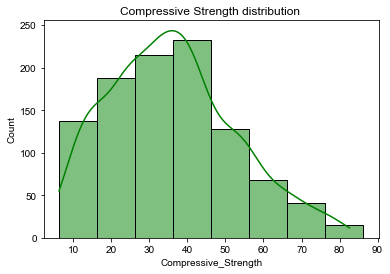

In [15]:
sns.histplot(data=df,x="Compressive_Strength",kde=True,color='green',binwidth=10)
sns.set(rc={'figure.figsize':(7,5)})

plt.title('Compressive Strength distribution ')
plt.show()
# The graph appears to be a skewed normal distribution curve

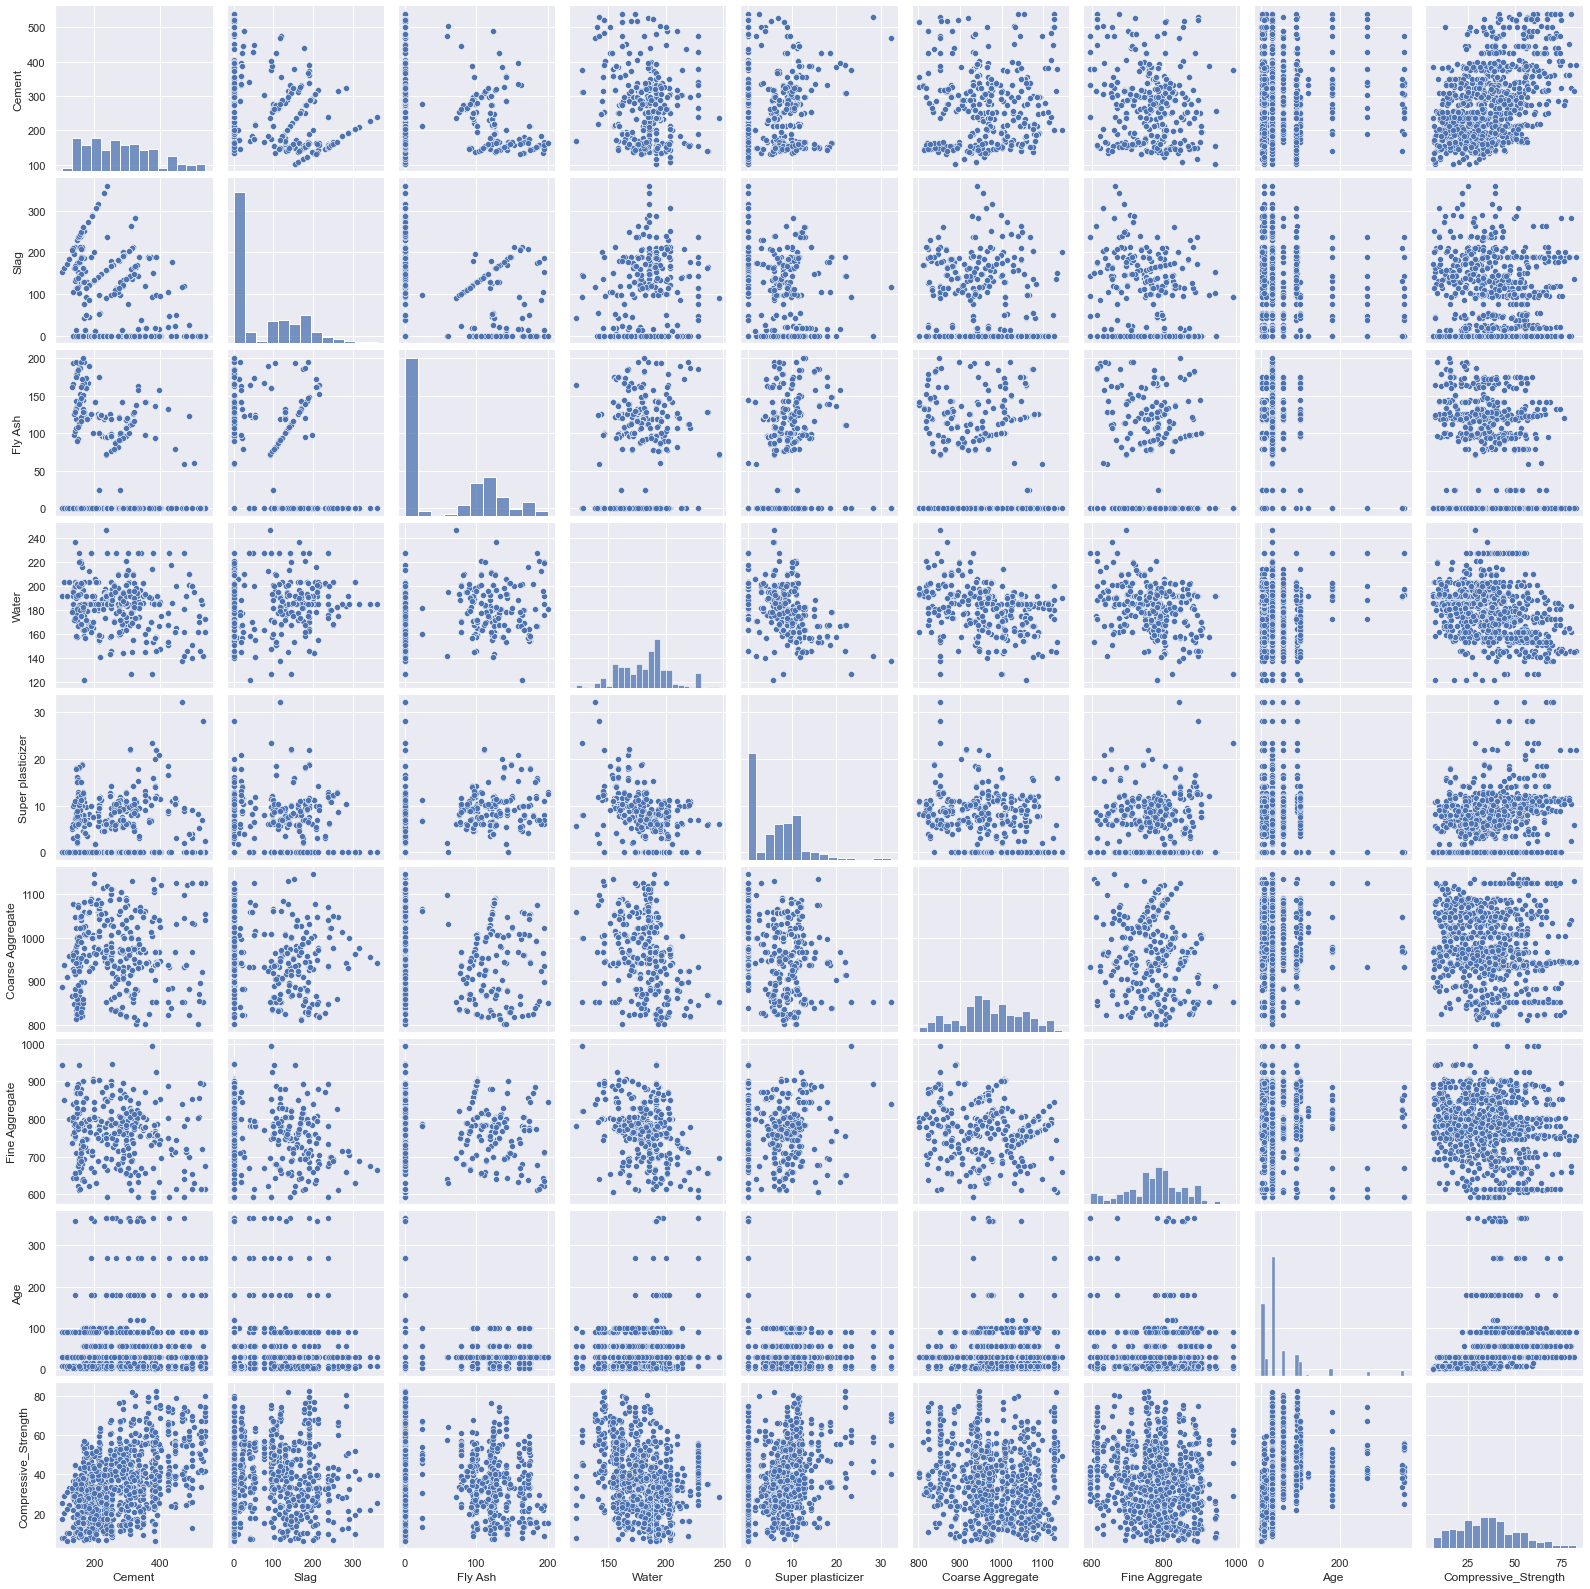

In [16]:
sns.pairplot(df)
sns.set(rc={'figure.figsize':(20,15)})
plt.show()
# Bird's eye view of all the possible plots and by visual inspection besides cement no other parameter
# seems to influence Compressive strength in linear fashion

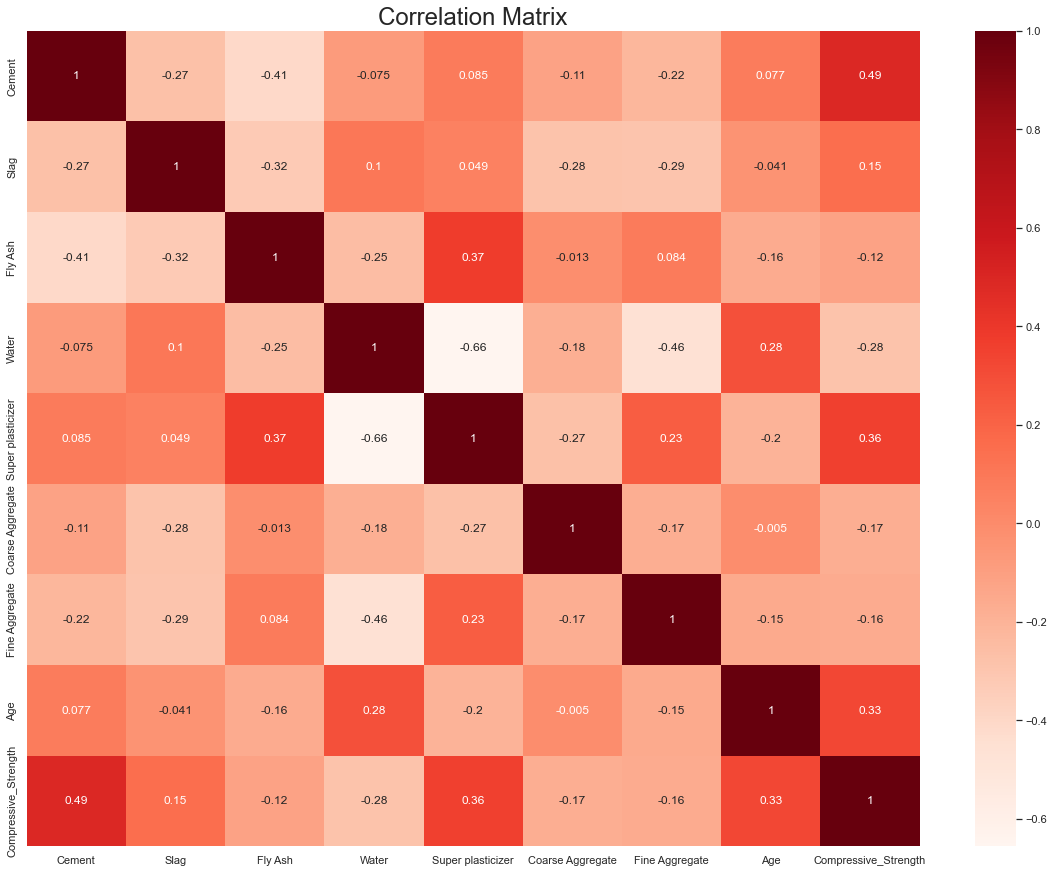

In [17]:
corr = df.corr()

sns.heatmap(corr,annot=True, cmap='Reds')
sns.set(rc={'figure.figsize':(30,15)})
sns.set(font_scale=2)
plt.title("Correlation Matrix")
plt.savefig('/Users/svishnuprasadha/Desktop/SCT/corr.png', bbox_inches='tight')
# Correlation matrix gives an idea of the various dependancies of each componenets and based on this we can infer that
# Compressive strength depends mostly on cement and followed by Super plasticizer and Age.

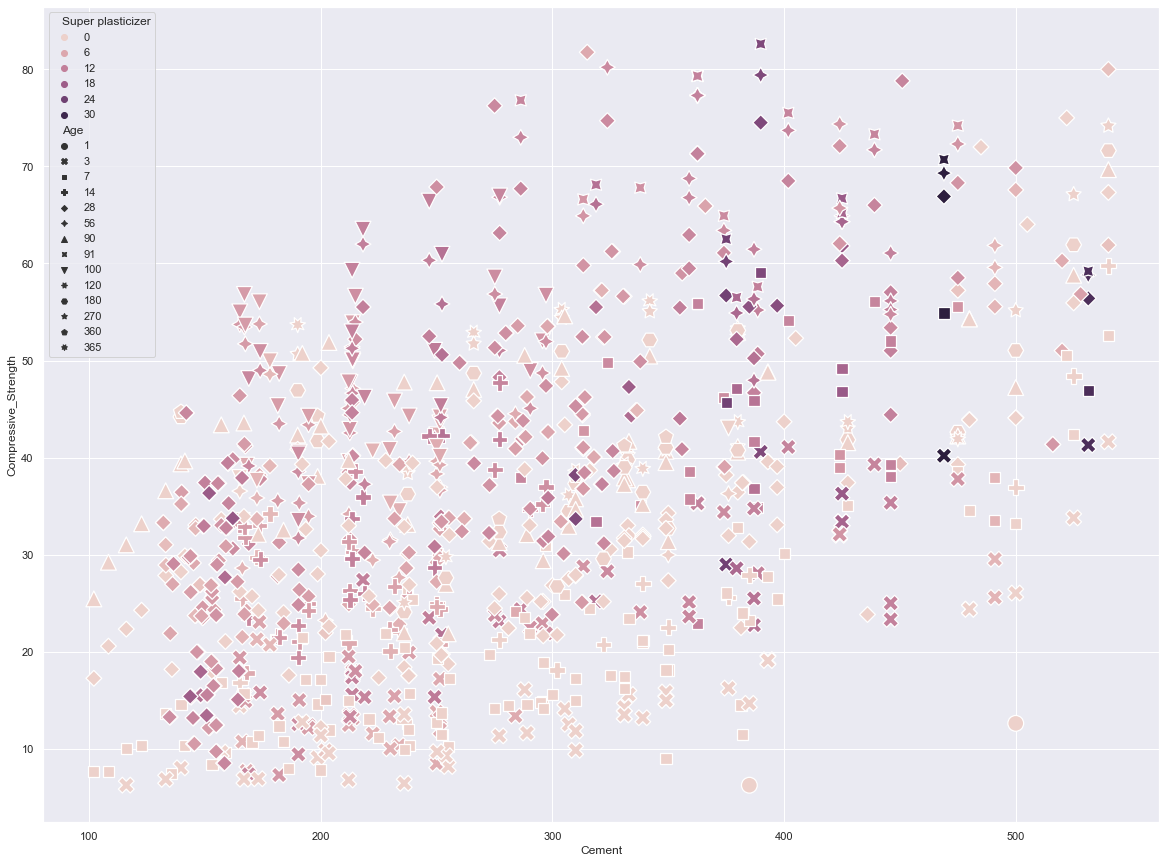

In [18]:
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot(data=df,y='Compressive_Strength',x='Cement',hue='Super plasticizer',style='Age',s=250)
plt.savefig('/Users/svishnuprasadha/Desktop/SCT/scatterplot-1.png', bbox_inches='tight')

# Based on this figure we can clearly visualise that the dependancy of compressive strength on the cement is more
# dominant than its dependancy on Super plasticizer and is in accordance with that of results of correlation matrix.

<AxesSubplot:xlabel='Cement', ylabel='Compressive_Strength'>

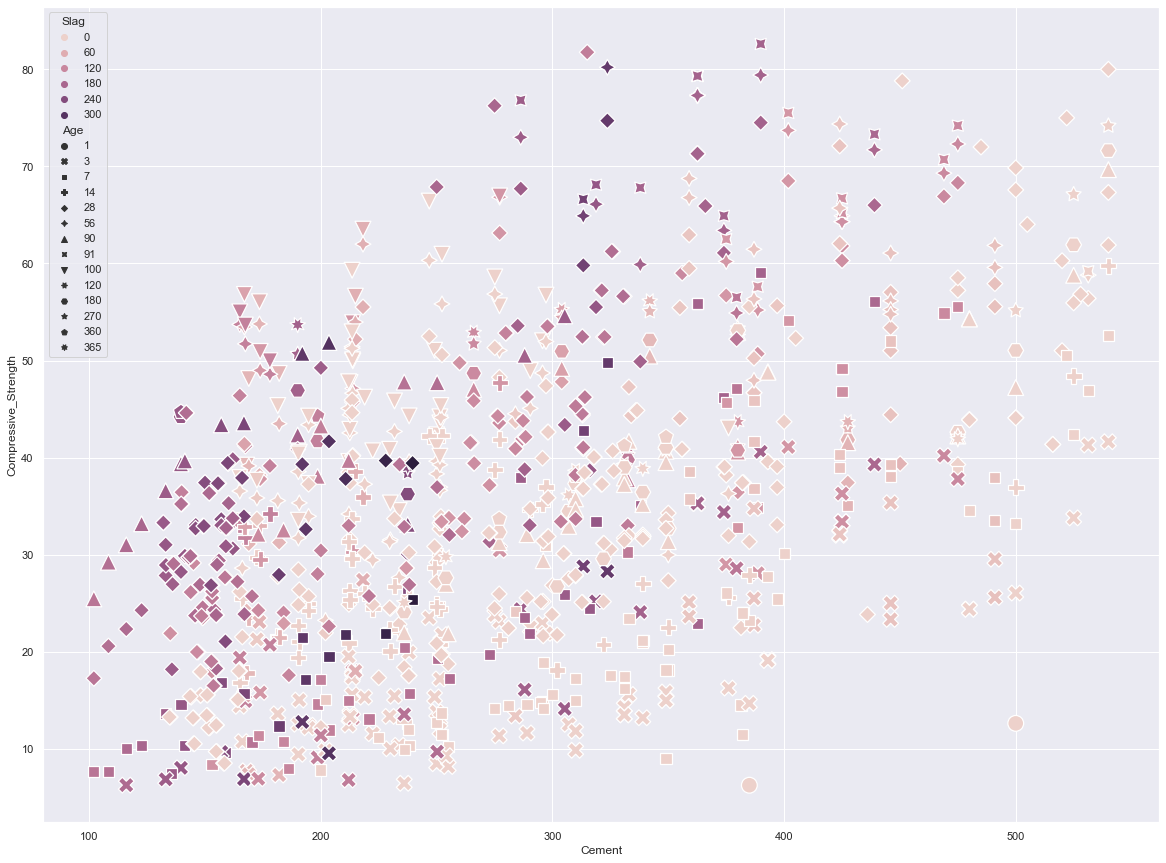

In [19]:
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot(data=df,y='Compressive_Strength',x='Cement',hue='Slag',style='Age',s=250)


# The conclusions from this scatterplot are that the compressive strength is not heavily dependant on the slag value
# Thus the from the two scatterplots results of correlation matrix are cross validated.

In [20]:
max_cs = df['Compressive_Strength'].max()
min_cs = df['Compressive_Strength'].min()
df_scaled = (df-df.min())/(df.max()-df.min())

df_scaled.sample(10)

max_val = df_scaled.max()

min_val = df_scaled.min()

if(np.max(max_val)>1 or np.min(min_val)<0):
    print('Needs to be rescaled and outliers need to be identified')
else:
    print('Scaling has been done')
       
# Scaling all the data points and normalising them into values between 0 and 1 and a check to see all values
# are real positive integers of data type float and has no categorical variables

Scaling has been done


# Model Building

In [21]:
x = df_scaled.drop(['Compressive_Strength'],axis=1)

y = df_scaled['Compressive_Strength']

# Split the dataset into two parts one the x data structure holds all the input parameters and the y data structure
# holds the compressive strength value i.e the value that is to be predicted

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=200,shuffle=True)

# Splitting the train test sample in the ratio of 80 : 20 where 80% of the sample is used for training and the 
# rest are used for cross validation while testing

In [23]:

ANN_model_1 = Sequential()

ANN_model_1.add(Dense(units=30,activation='relu',kernel_initializer='uniform',input_dim=8))

ANN_model_1.add(Dense(units=38,activation='relu',kernel_initializer='uniform'))

ANN_model_1.add(Dense(units=42,activation='relu',kernel_initializer='uniform'))

ANN_model_1.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

ANN_model_1.compile(loss='mean_absolute_error', optimizer='Adam',metrics=['mean_squared_error'])

ANN_model_1.fit(x_train,y_train,batch_size=40,epochs=1000,verbose=1)

# A prelimnary model is made using packages from tensorflow and keras module. By trial and error the model's
# architechture is as follows it comprises of a single input layer which has the dimension of 8 i.e 8 parameters
# followed by multiple hidden layers followed by an output layer. For all the non output
# layers relu activation function has been used and for the output layer sigmoidal function has been used
# Number of epochs has been set to 1000. The loss i.e model is evaluated on the basis of mean absoulte error
# and the model's efficiency is noted on the basis of mean squared error

2022-04-10 09:18:53.865171: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-10 09:18:53.866754: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/1000
819/819 [==============================] - 1s 612us/step - loss: 0.2017 - mean_squared_error: 0.0583
Epoch 2/1000
819/819 [==============================] - 0s 37us/step - loss: 0.1936 - mean_squared_error: 0.0543
Epoch 3/1000
819/819 [==============================] - 0s 38us/step - loss: 0.1758 - mean_squared_error: 0.0470
Epoch 4/1000
819/819 [==============================] - 0s 38us/step - loss: 0.1692 - mean_squared_error: 0.0448
Epoch 5/1000
819/819 [==============================] - 0s 40us/step - loss: 0.1608 - mean_squared_error: 0.0400
Epoch 6/1000
819/819 [==============================] - 0s 38us/step - loss: 0.1468 - mean_squared_error: 0.0339
Epoch 7/1000
819/819 [==============================] - 0s 36us/step - loss: 0.1308 - mean_squared_error: 0.0271
Epoch 8/1000
819/819 [==============================] - 0s 38us/step - loss: 0.1206 - mean_squared_error: 0.0229
Epoch 9/1000
819/819 [==============================] - 0s 39us/step - loss: 0.1114 - mean_squa

In [24]:
history_1 = ANN_model_1.fit(x_test,y_test,epochs=2000,verbose=1,validation_split=0.2)

Train on 164 samples, validate on 41 samples
Epoch 1/2000
164/164 [==============================] - 0s 441us/step - loss: 0.0565 - mean_squared_error: 0.0074 - val_loss: 0.0576 - val_mean_squared_error: 0.0069
Epoch 2/2000
164/164 [==============================] - 0s 67us/step - loss: 0.0569 - mean_squared_error: 0.0073 - val_loss: 0.0626 - val_mean_squared_error: 0.0078
Epoch 3/2000
164/164 [==============================] - 0s 62us/step - loss: 0.0580 - mean_squared_error: 0.0075 - val_loss: 0.0586 - val_mean_squared_error: 0.0071
Epoch 4/2000
164/164 [==============================] - 0s 73us/step - loss: 0.0552 - mean_squared_error: 0.0070 - val_loss: 0.0554 - val_mean_squared_error: 0.0065
Epoch 5/2000
164/164 [==============================] - 0s 73us/step - loss: 0.0547 - mean_squared_error: 0.0069 - val_loss: 0.0565 - val_mean_squared_error: 0.0066
Epoch 6/2000
164/164 [==============================] - 0s 77us/step - loss: 0.0562 - mean_squared_error: 0.0070 - val_loss: 0.06

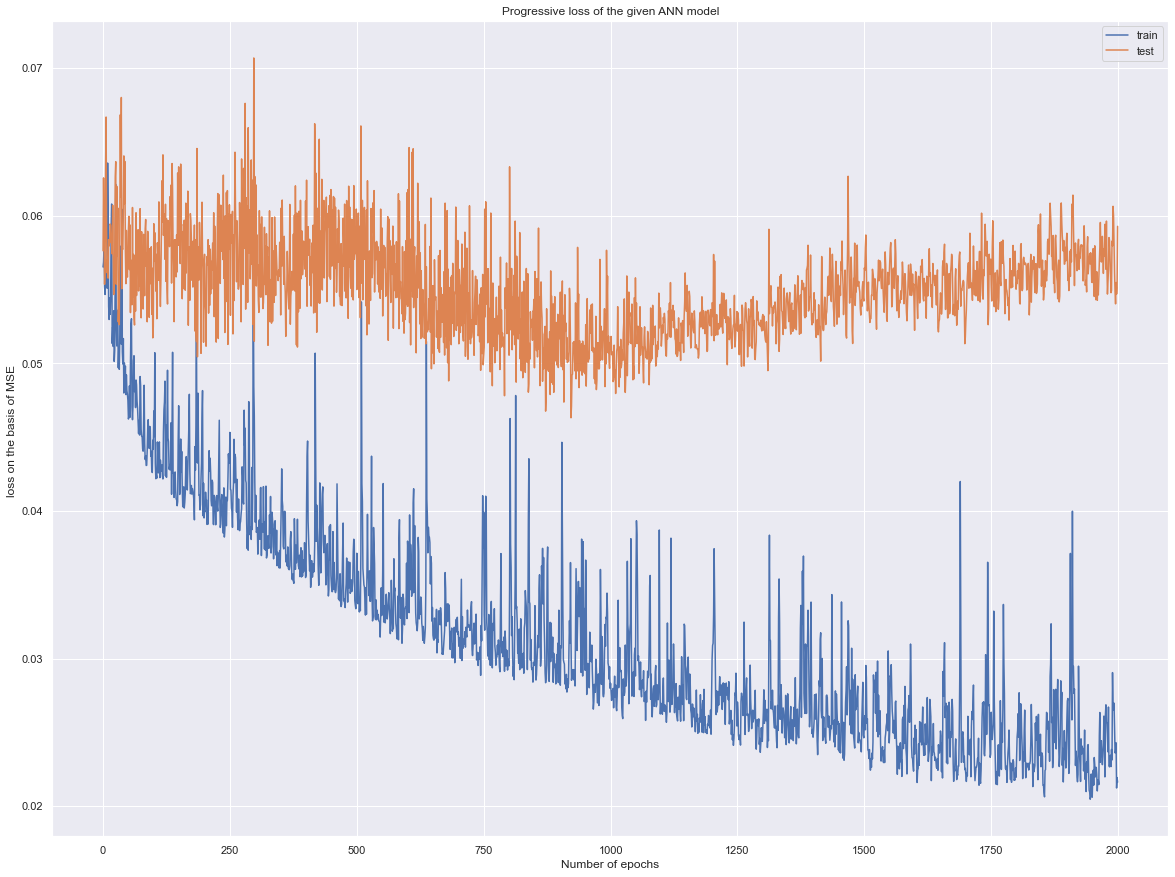

In [25]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Progressive loss of the given ANN model')
plt.ylabel('loss on the basis of MSE ')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'])
plt.show()

In [26]:
def model_build(layers,activation):
    
    model = Sequential()
    
    for i,nodes in enumerate(layers):
        
        if i==0:
            
            model.add(Dense(nodes,input_dim = x_train.shape[1]))
            model.add(Activation(activation))
            
        else:
            
            model.add(Dense(nodes))
            model.add(Activation(activation))
            
    model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
    
    model.compile(optimizer='Adam',loss = 'mean_absolute_error',metrics=['mean_squared_error'])
    
    return model

model = KerasClassifier(build_fn=model_build,verbose=0)

# To ensure that the optmium number of nodes has to be decided for the neural network a custom function is created
# The function takes in two inputs number of layers and the activation function. Using the enumerate function we
# go through the pre specified number of layers and add the desired number of nodes and activation function and
# subsequently evaluating the model based on our choosen metrics.

In [27]:
model

In [28]:
layers = [(28,19,10),(36, 24, 12),(33,19,12),(25,17,12),(36,23,11),(26,16,12)]

activations = ['relu','tanh','sigmoid','leaky_relu']

param_grid = dict(layers=layers, activation=activations, batch_size = [100,200], epochs=[30])

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

# Use grid search cross validation to compute the best possible combination of all the possible trials
# a dictionary based on paramter grid has been made and this is to be inputed into the model we earlier made and the 
# best possible combination is selected.

In [29]:
grid_result =grid.fit(x_train,y_train)


/Users/svishnuprasadha/opt/anaconda3/envs/dl_2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/svishnuprasadha/opt/anaconda3/envs/dl_2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/svishnuprasadha/opt/anaconda3/envs/dl_2/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/svishnuprasadha/opt/anaconda3/envs/dl_2/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py", line 298, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  Use

In [30]:
[grid_result.best_params_]

# The best suited activation function is relu and the number of neurons are 28,19,10

[{'activation': 'relu',
  'batch_size': 100,
  'epochs': 30,
  'layers': (28, 19, 10)}]

In [31]:
from keras.optimizers import adam

ANN_model_2 = Sequential()

ANN_model_2.add(Dense(units=28,activation='relu',kernel_initializer='uniform',input_dim=8))

ANN_model_2.add(Dense(units=19,activation='relu',kernel_initializer='uniform'))

ANN_model_2.add(Dense(units=10,activation='relu',kernel_initializer='uniform'))

ANN_model_2.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

opt =adam(lr=0.0001)

ANN_model_2.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error','mean_squared_error'])

#initial model using adam optimizer

In [32]:
history_2 = ANN_model_2.fit(x_test,y_test,epochs=8000,verbose=0,validation_split=0.2)

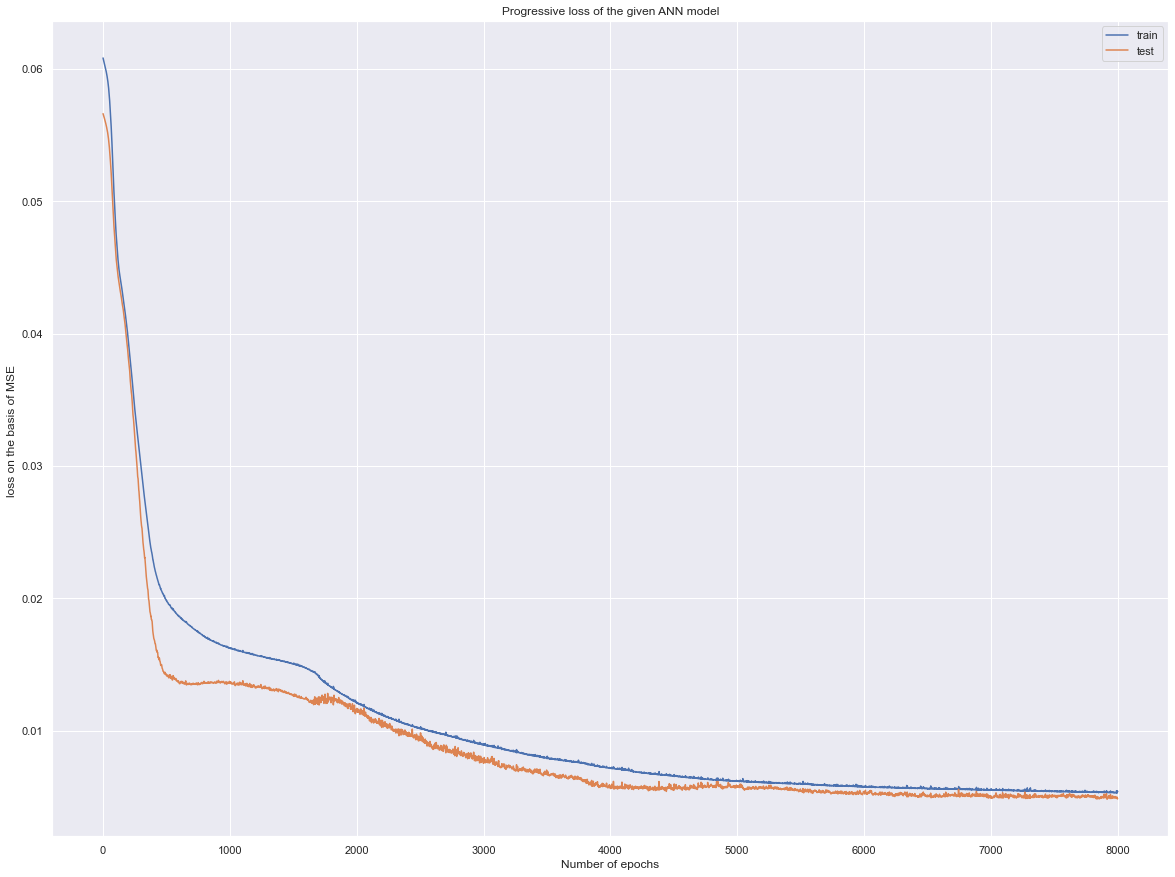

In [33]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Progressive loss of the given ANN model')
plt.ylabel('loss on the basis of MSE ')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'])
plt.show()


In [34]:
y_predicted = ANN_model_2.predict(x_test)

In [35]:
mean_squared_error(y_test,y_predicted)

0.005263692493213086

In [36]:
mean_absolute_error(y_test,y_predicted)

0.054282674959131284

In [37]:
r2_score(y_test,y_predicted)

# Note that this model using adam optmizers performs better than that of the one using SGD however it is imperative to
# note that this slightly higher level of accuracy is reaching at 13000 epochs and hence computationally expensive.

0.8869714332754048

In [38]:
from keras.optimizers import SGD

ANN_model = Sequential()

ANN_model.add(Dense(units=28,activation='relu',kernel_initializer='uniform',input_dim=8))

ANN_model.add(Dense(units=19,activation='relu',kernel_initializer='uniform'))

ANN_model.add(Dense(units=10,activation='relu',kernel_initializer='uniform'))

ANN_model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

opt =SGD(lr=0.05)

ANN_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error','mean_squared_error'])



# Creating the optmimum model with the efficient number of neurons has been made after hypertuning with the help of 
# Grid Search CV the given network as multiple hidden layers with the activation function relu and the output 
# layer consist of activation sigmoidal function. Stochastic Gradient Descent optmizer has been used with the
# learning rate of 0.05 also the loss has been specified as mean squared error also note that 6000 epochs will be used

In [39]:
history = ANN_model.fit(x_test,y_test,epochs=6000,verbose=0,validation_split=0.2)

# To the store the data related to the efficiency of the model and consequently for plotting

In [40]:
ANN_model.fit(x_train,y_train,batch_size=35, epochs=6000,verbose=0)
 
# Model fitting is needed here since SGD is being used a specified batch size with a larnge number of epochs is used
# Note : Verbose has been set to 0 since visual info regarding loss is not required.

In [41]:
ann_viz(ANN_model, title="Visually generated neural network using graphviz S Vishnuprasadha B190308CE ")
# Actual visual representation using graph viz and ANN visualiser

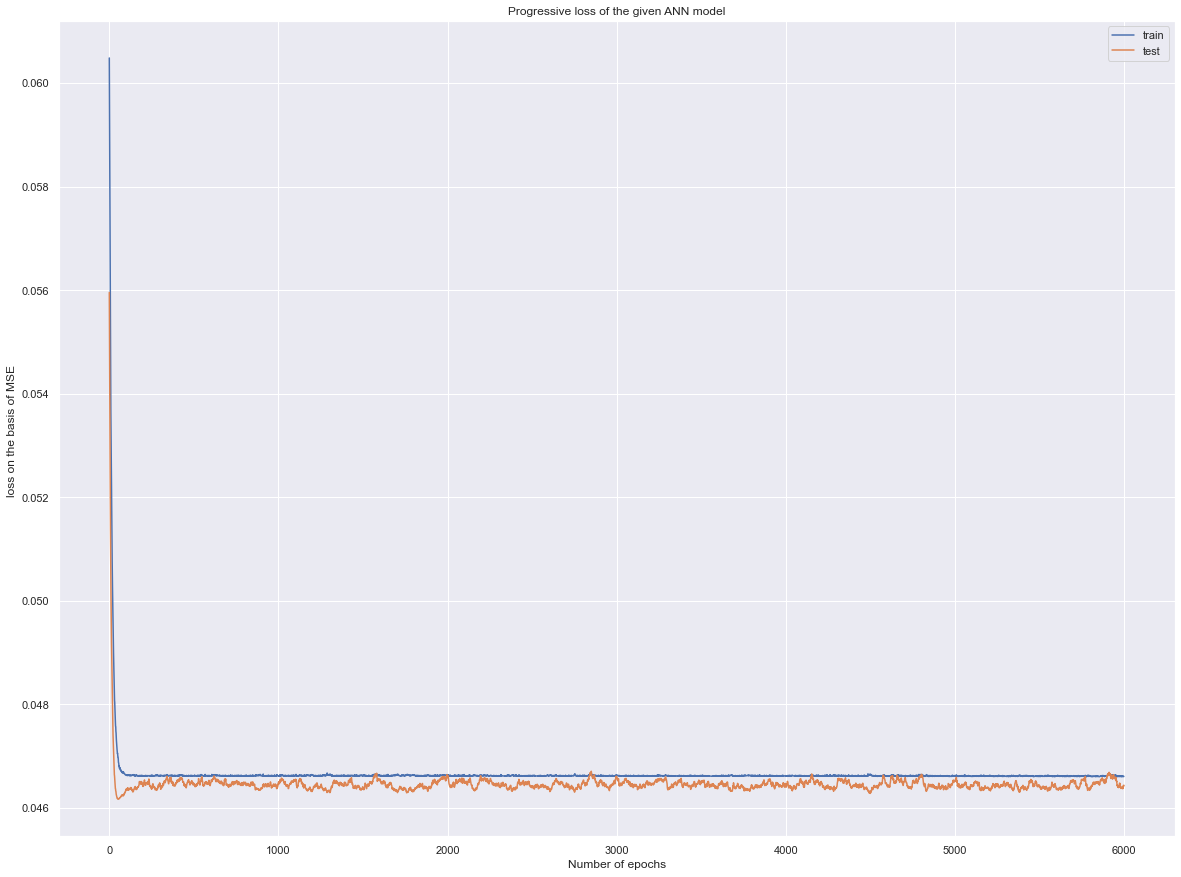

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Progressive loss of the given ANN model')
plt.ylabel('loss on the basis of MSE ')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'])
plt.show()
# From the graph since the test and predicted values are not varying drastically it can be infered that there
# is negligble amount of overfitting and hence the model can be safely used for predictions.

In [43]:
ANN_model.summary()
# Model summary

Model: "sequential_244"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_793 (Dense)            (None, 28)                252       
_________________________________________________________________
dense_794 (Dense)            (None, 19)                551       
_________________________________________________________________
dense_795 (Dense)            (None, 10)                200       
_________________________________________________________________
dense_796 (Dense)            (None, 1)                 11        
Total params: 1,014
Trainable params: 1,014
Non-trainable params: 0
_________________________________________________________________


In [44]:
y_predicted = ANN_model.predict(x_test)

# Predicting the model for cross checking manually at a glancing

In [45]:
mean_squared_error(y_test,y_predicted)

# The mean squared error value is within the accepable limits and it is observed to progressively decline as number
# of epochs are increased in this non overfitted model

0.00663880511155929

In [46]:
mean_absolute_error(y_test,y_predicted)

# The mean absolute error value is also acceptable

0.056616043076430776

In [47]:
r2_score(y_test,y_predicted)

# The give R2 score shows that the regression model is fitted quite well to improve R2 score to a certain extent
# we can increase the number of epochs or obtain more input dat

0.8574433009734169

In [48]:
pred_denormalized = []
for i in y_predicted :
    pred_denormalized.append(i*(max_cs-min_cs)+min_cs)

pred_denormalized = list(np.float_(pred_denormalized)) 

test_denormalized = []

for i in y_test :
    test_denormalized.append(i*(max_cs-min_cs)+min_cs)
test_denormalized = list(np.float_(test_denormalized))

# Denormalizing the y_test and predicted values to the cross inspect visually to ensure that the discrepancy is within
# the acceptable limits. 

In [49]:
for i,j in zip(pred_denormalized,test_denormalized):
    print('The predicted value is',np.round(np.float_(i),2),'and the actual value is found to be',np.round(np.float(j),2) )

The predicted value is 10.18 and the actual value is found to be 9.99
The predicted value is 42.96 and the actual value is found to be 42.35
The predicted value is 43.85 and the actual value is found to be 43.7
The predicted value is 11.05 and the actual value is found to be 12.05
The predicted value is 62.65 and the actual value is found to be 61.46
The predicted value is 25.13 and the actual value is found to be 23.69
The predicted value is 34.14 and the actual value is found to be 33.27
The predicted value is 26.73 and the actual value is found to be 31.35
The predicted value is 25.74 and the actual value is found to be 23.52
The predicted value is 36.53 and the actual value is found to be 45.9
The predicted value is 19.61 and the actual value is found to be 20.28
The predicted value is 28.85 and the actual value is found to be 32.63
The predicted value is 29.14 and the actual value is found to be 31.45
The predicted value is 66.99 and the actual value is found to be 71.3
The predic

/Users/svishnuprasadha/opt/anaconda3/envs/dl_2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


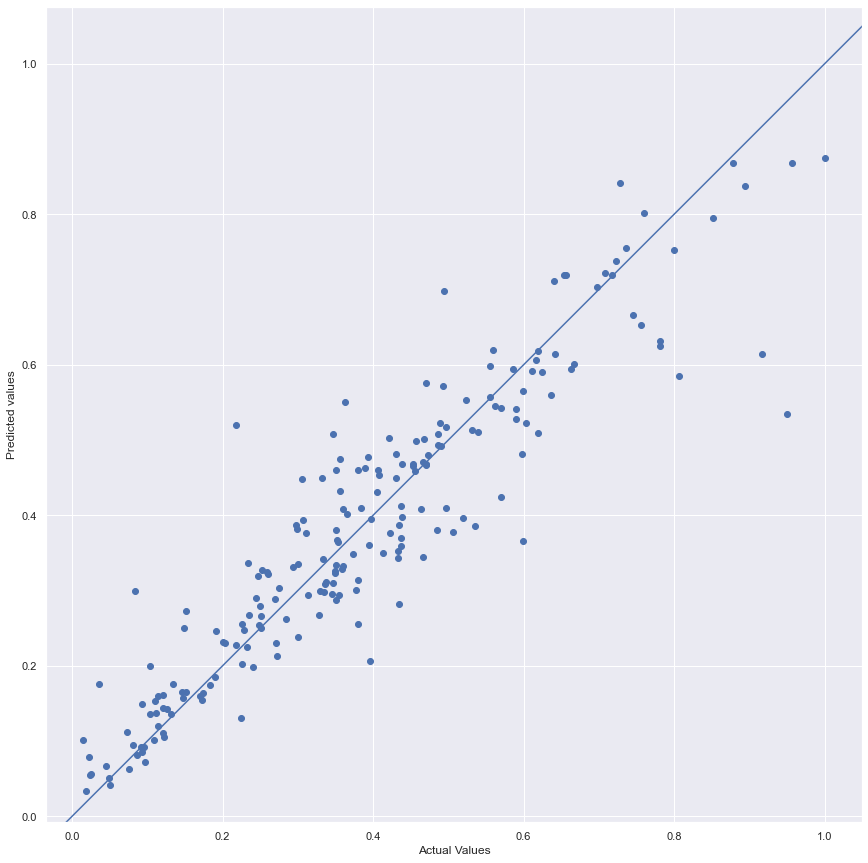

In [50]:
y_predicted = ANN_model.predict(x_test).flatten()

plt.scatter(y_test, y_predicted)

plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.savefig('/Users/svishnuprasadha/Desktop/SCT/test_predicted.png', bbox_inches='tight')

# Here it is observed the true vs predicted values holds good for the lower ranges of compressive strength however
# at the higher ranges of compressive strength the predictions are showing more deviations from the expected value
# Note : normalized values are plotted

# Support Vector Machine

In [51]:
from sklearn.svm import SVR
SVM_model=SVR()

In [52]:
SVR_linear_model = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
SVR_linear_model.fit(x_train, y_train) 

# Create a model based on linear kernel

SVR(kernel='linear')

In [53]:
SVR_linear_model.score(x_test,y_test)

# Compute the score of the model

0.5722274277280321

In [54]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(x_train, y_train) 

# Use radial basis function for to recreate the model

SVR()

In [55]:
svr_rbf.score(x_test,y_test)

# Compute the rbf score

0.790176827116339

In [56]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}

#Set the parameter grid and use grid search cv

In [57]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)

In [58]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
grid.best_estimator_

SVR(C=5)

In [60]:
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.02)
svr_best.fit(x_train, y_train)

# Found out the best fit value for the given model.

SVR(C=5.0, epsilon=0.02)

In [61]:
svr_best.score(x_test,y_test)

# Compute the best fit rbf score

0.8475927897357982

In [62]:
svr_best.fit(x_train,y_train)

SVR(C=5.0, epsilon=0.02)

In [63]:
svr_predictions=svr_best.predict(x_test)

In [64]:
pred_denormalized = []
for i in svr_predictions :
    pred_denormalized.append(i*(max_cs-min_cs)+min_cs)

pred_denormalized = list(np.float_(pred_denormalized)) 

test_denormalized = []

for i in y_test :
    test_denormalized.append(i*(max_cs-min_cs)+min_cs)
test_denormalized = list(np.float_(test_denormalized))

In [65]:
for i,j in zip(pred_denormalized,test_denormalized):
    print('The predicted value is',np.round(np.float_(i),2),'and the actual value is found to be',np.round(np.float(j),2) )

The predicted value is 10.0 and the actual value is found to be 9.99
The predicted value is 43.63 and the actual value is found to be 42.35
The predicted value is 45.19 and the actual value is found to be 43.7
The predicted value is 9.72 and the actual value is found to be 12.05
The predicted value is 60.64 and the actual value is found to be 61.46
The predicted value is 23.91 and the actual value is found to be 23.69
The predicted value is 27.85 and the actual value is found to be 33.27
The predicted value is 26.22 and the actual value is found to be 31.35
The predicted value is 33.57 and the actual value is found to be 23.52
The predicted value is 34.02 and the actual value is found to be 45.9
The predicted value is 21.88 and the actual value is found to be 20.28
The predicted value is 28.57 and the actual value is found to be 32.63
The predicted value is 27.8 and the actual value is found to be 31.45
The predicted value is 62.65 and the actual value is found to be 71.3
The predicted

/Users/svishnuprasadha/opt/anaconda3/envs/dl_2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


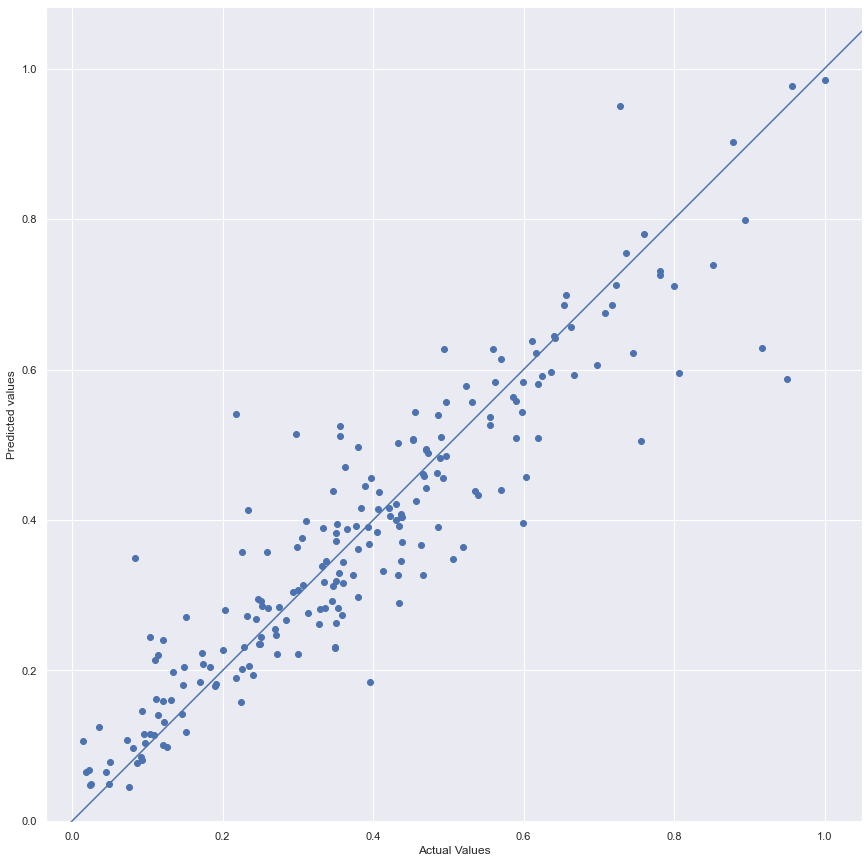

In [66]:
plt.scatter(y_test, svr_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()